In [55]:
import os
import math
from pathlib import Path

import numpy  as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.linear_model import LogisticRegression
import hdbscan

# metrics
from sklearn.metrics import r2_score, f1_score, accuracy_score

## Generate Data

<Axes: >

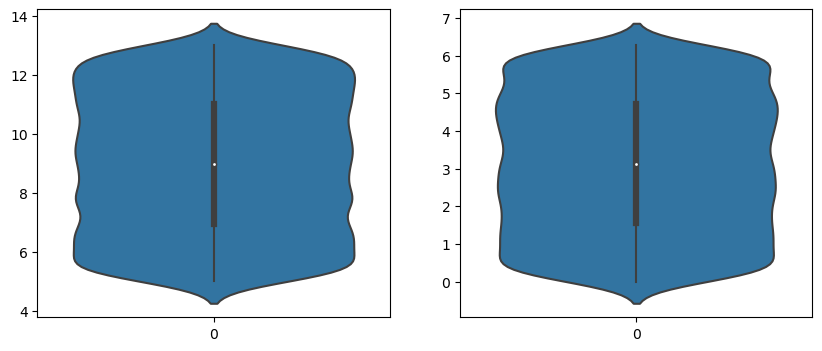

In [9]:
n_samples = 10000

# sample distances using the same process
distances = stats.uniform.rvs(5, 8, size=n_samples).reshape(-1, 1)
angles = stats.uniform.rvs(0, 2 * np.pi, size=n_samples).reshape(-1, 1)
X_sample = np.hstack((distances, angles))

# introduce a relationship between the distance and the response via probability dependet on distance
p_sample = 1 - (X_sample[:, 0] - 5) / 8

# sample responses using manipulated probabilities
y_sample = np.array([stats.bernoulli.rvs(p) for p in p_sample])

fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
sns.violinplot(distances, ax=ax[0])
sns.violinplot(angles, ax=ax[1])

## Annulus Generation and Plotting

In [51]:
def to_coordinates(distances, angles):
    xs = distances * np.cos(angles)
    ys = distances * np.sin(angles)
    coords = np.hstack((xs, ys))
    return coords

In [94]:
def generate_stimulus(n_samples):
    distances = stats.uniform.rvs(5, 8, size=n_samples).reshape(-1, 1)
    angles = stats.uniform.rvs(0, 2 * np.pi, size=n_samples).reshape(-1, 1)
    return to_coordinates(distances, angles)

In [96]:
def generate_and_plot(n_samples, ax):
    # generate coordinates
    annulus = generate_stimulus(n_samples)
    
    # select one as the target
    classes = np.zeros(n_samples)
    target  = np.random.randint(0, n_samples)
    classes[target] = 1
    
    # cluster the points to asses the level of clutter
    clustering = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True).fit(annulus)
    
    # plot the points
    sns.scatterplot(x=annulus[:, 0], y=annulus[:, 1], hue=clustering.labels_, style=classes, ax=ax)         
    
    # add guides
    inner_guide = plt.Circle(xy=(0, 0), radius=5, color='grey', fill=False)
    outer_guide = plt.Circle(xy=(0, 0), radius=13, color='grey', fill=False)
    ax.add_patch(inner_guide)
    ax.add_patch(outer_guide)
       
    ax.set(xlim=(-15, 15))
    ax.set(ylim=(-15, 15))

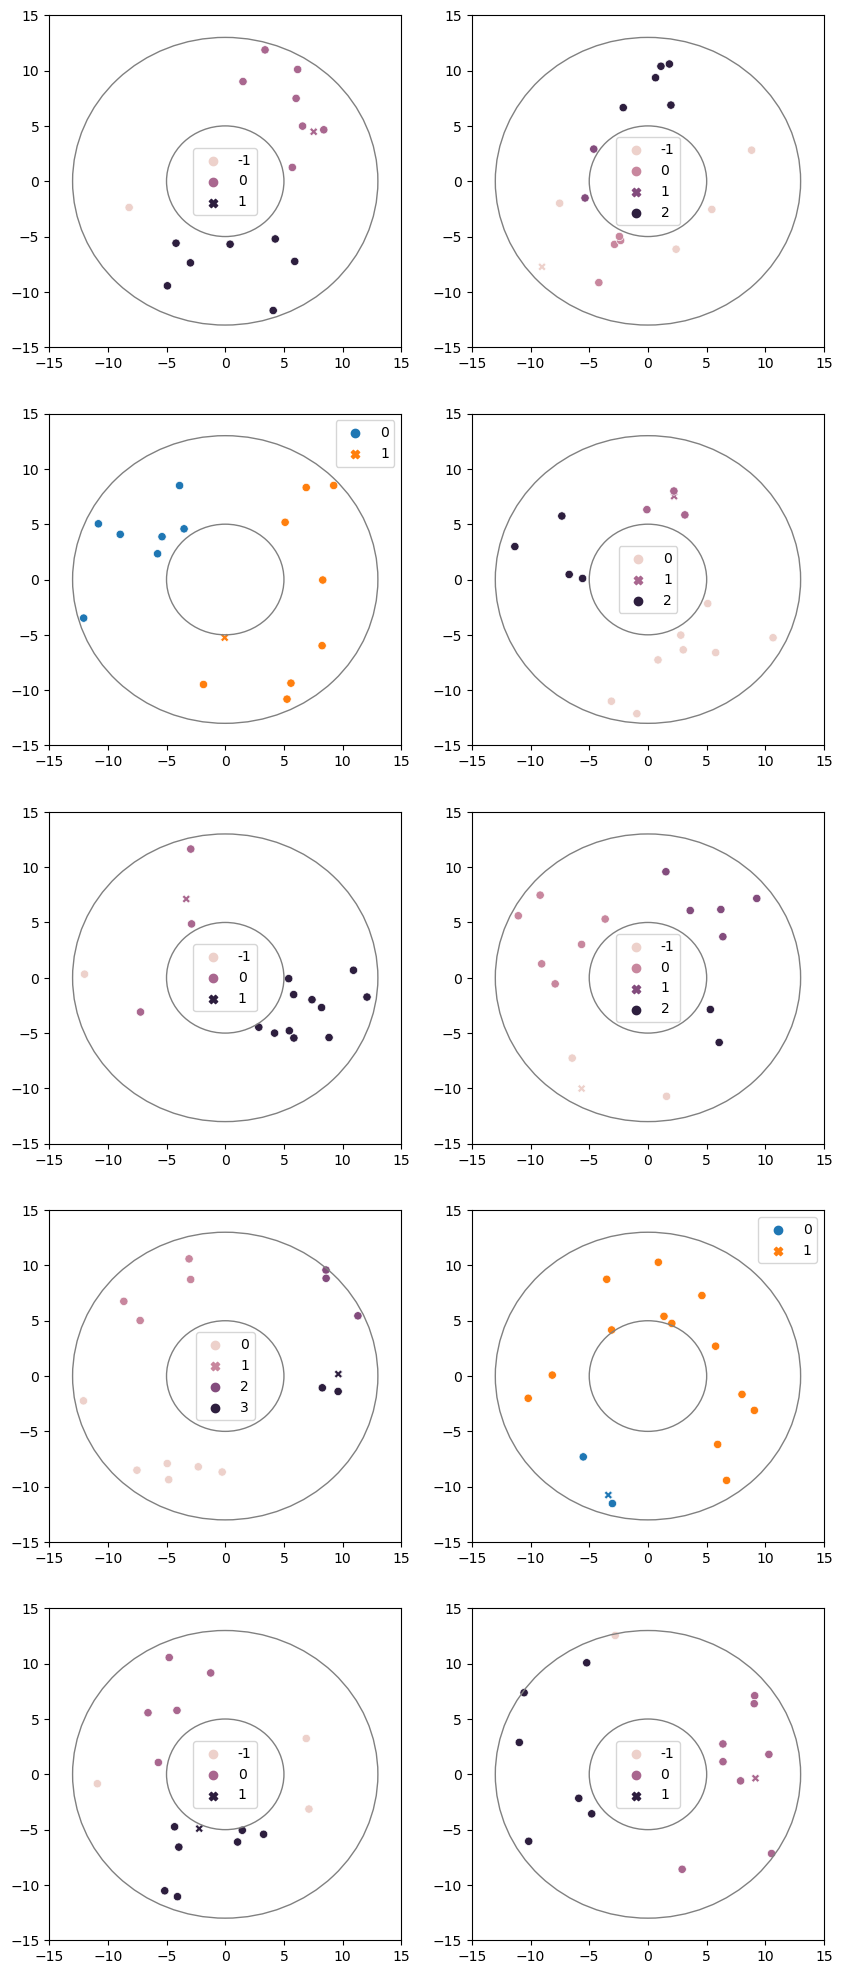

In [98]:
ncols = 2
nrows = 5
fig, ax = plt.subplots(figsize=(5 * ncols, 5 * nrows), ncols=ncols, nrows=nrows)
for i in range(ncols):
    for j in range(nrows):
        generate_and_plot(16, ax[j, i])

plt.show()